In [51]:
#importation des bibliotheque
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.io as pio




In [55]:
# charger des donnes
events = pd.read_csv('../data/raw/events.csv', sep= ',')
item_properties_part1 = pd.read_csv('../data/raw/item_properties_part1.csv' , sep= ',')
item_properties_part2 = pd.read_csv('../data/raw/item_properties_part2.csv' , sep= ',')
category_tree = pd.read_csv('../data/raw/item_properties_part1.csv'  , sep= ',')


In [ ]:
#  premiere ligne
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
#inclue numerique et categorielle
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [ ]:
#afficher les lignes et colonnes
events.shape

(2756101, 5)

In [ ]:
#les valeur manquantes
events.isnull().sum() 

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [ ]:
# Statistiques descriptives 
events.describe(include="all")   

,timestamp,visitorid,event,itemid,transactionid
count,2.756101e+06,2.756101e+06,2756101,2.756101e+06,22457.000000
unique,NaN,NaN,3,NaN,NaN
top,NaN,NaN,view,NaN,NaN
freq,NaN,NaN,2664312,NaN,NaN
mean,1.436424e+12,7.019229e+05,NaN,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,NaN,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,NaN,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,NaN,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,NaN,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,NaN,3.507150e+05,13224.000000


In [ ]:
# Doublons 
events.duplicated().sum() 


np.int64(460)

In [ ]:
#suppression
events.dropna()

,timestamp,visitorid,event,itemid,transactionid
130,1433222276276,599528,transaction,356475,4000.0
304,1433193500981,121688,transaction,15335,11117.0
418,1433193915008,552148,transaction,81345,5444.0
814,1433176736375,102019,transaction,150318,13556.0
843,1433174518180,189384,transaction,310791,7244.0
...,...,...,...,...,...
2755294,1438377176570,1050575,transaction,31640,8354.0
2755349,1438379878779,861299,transaction,456602,3643.0
2755508,1438357730123,855941,transaction,235771,4385.0
2755603,1438355560300,548772,transaction,29167,13872.0


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [ ]:
# afficher les types de donnes
print(events.dtypes)

timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_23068\1594262287.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




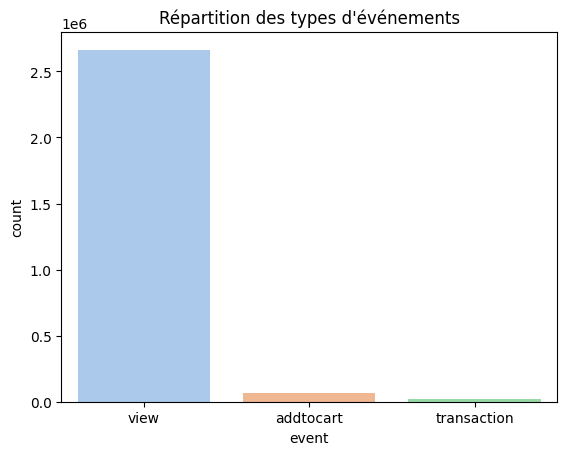

In [ ]:
#Répartition des types d'événements
sns.countplot(data=events, x="event", palette="pastel")
plt.title("Répartition des types d'événements")
plt.show()


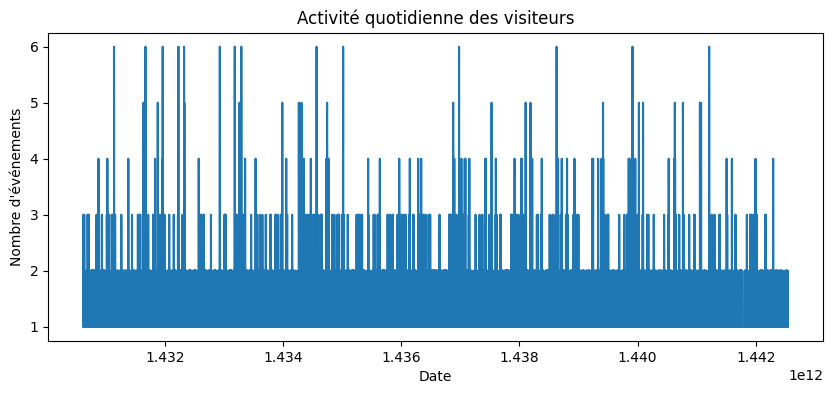

In [ ]:
#Activité par jour
events.groupby("timestamp")["visitorid"].count().plot(figsize=(10,4))
plt.title("Activité quotidienne des visiteurs")
plt.xlabel("Date")
plt.ylabel("Nombre d'événements")
plt.show()



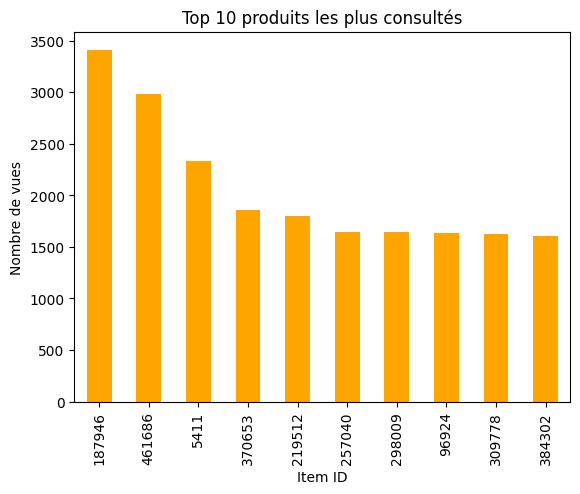

In [ ]:
# Produits les plus consultés
events['itemid'].value_counts().head(10).plot(kind='bar', color='orange')#valeur_counts():combien de fois chaque produit a été consulté
plt.title("Top 10 produits les plus consultés")
plt.xlabel("Item ID") #IDENTIFIANT DE PRODUIT
plt.ylabel("Nombre de vues")
plt.show()


In [ ]:
# Taux de conversion
nb_vue = events[events["event"]=="view"]["visitorid"].nunique()
nb_panier = events[events["event"]=="addtocart"]["visitorid"].nunique()
nb_achat = events[events["event"]=="transaction"]["visitorid"].nunique()

taux_ajout = (nb_panier/nb_vue)*100
taux_conversion = (nb_achat/nb_vue)*100

tableau = pd.DataFrame({
    "Étape": ["Vue produit", "Ajout au panier", "Achat finalisé"],
    "Visiteurs": [nb_vue, nb_panier, nb_achat],
    "Taux de conversion (%)": [100, taux_ajout, taux_conversion]
})
print(tableau)


             Étape  Visiteurs  Taux de conversion (%)
0      Vue produit    1404179               100.00000
1  Ajout au panier      37722                 2.68641
2   Achat finalisé      11719                 0.83458


In [ ]:
# afficher les donnes nettoyees
events.to_csv("donnees_nettoyees.csv", index=False)
print(" Données nettoyées exportées avec succès !")



 Données nettoyées exportées avec succès !


In [58]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Garde en mémoire le résultat
@st.cache_data
def charger_donnees():
    df = pd.read_csv("events.csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", errors="coerce")
    df["date"] = df["timestamp"].dt.date
    return df

2025-11-03 11:47:07.842 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [ ]:
#  Indicateurs clés

st.subheader("Indicateurs clés")
col1, col2, col3 = st.columns(3)

col1.metric("Nombre total d'événements", len(events))
col2.metric("Visiteurs uniques", events["visitorid"].nunique())
col3.metric("Produits uniques", events["itemid"].nunique())


2025-11-03 11:47:08.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 11:47:08.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
import pandas as pd

# Charger les fichiers CSV
dfevents = pd.read_csv('../DATA/events.csv', sep=',')
dfcategory = pd.read_csv('../DATA/category_tree.csv')
dfproperties1 = pd.read_csv('../DATA/item_properties_part1.csv')
dfproperties2 = pd.read_csv('../DATA/item_properties_part2.csv')

# Combiner les propriétés
dfproperties = pd.concat([dfproperties1, dfproperties2], ignore_index=True)

# Exemple de nettoyage
# Supprimer les doublons
dfevents = dfevents.drop_duplicates()
dfcategory = dfcategory.drop_duplicates()
dfproperties = dfproperties.drop_duplicates()

# Remplacer les valeurs manquantes si nécessaire
dfcategory['parentid'] = dfcategory['parentid'].fillna(0).astype(int)
dfcategory['categoryid'] = dfcategory['categoryid'].astype(int)

# Afficher un aperçu
print(dfevents.head())
print(dfcategory.head())
print(dfproperties.head())


       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
   categoryid  parentid
0        1016       213
1         809       169
2         570         9
3        1691       885
4         536      1691
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513


In [ ]:
 # Analyse ses donnner pour "data/category_tree.csv"ArithmeticError
category_tree.head() 


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [ ]:
category_tree.describe()

,timestamp,itemid
count,1.100000e+07,1.100000e+07
mean,1.435158e+12,2.333851e+05
std,3.327653e+09,1.348258e+05
min,1.431227e+12,0.000000e+00
25%,1.432436e+12,1.165150e+05
50%,1.433646e+12,2.334990e+05
75%,1.437880e+12,3.501860e+05
max,1.442113e+12,4.668660e+05


In [ ]:
#afficher les lignes et colonnes
category_tree.shape

(10999999, 4)

In [ ]:
#les valeur manquantes
category_tree.isnull().sum() 

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [ ]:
# Statistiques descriptives 
category_tree.describe(include="all")  

,timestamp,itemid,property,value
count,1.100000e+07,1.100000e+07,10999999,10999999
unique,NaN,NaN,1097,1231581
top,NaN,NaN,888,769062
freq,NaN,NaN,1629817,833710
mean,1.435158e+12,2.333851e+05,NaN,NaN
std,3.327653e+09,1.348258e+05,NaN,NaN
min,1.431227e+12,0.000000e+00,NaN,NaN
25%,1.432436e+12,1.165150e+05,NaN,NaN
50%,1.433646e+12,2.334990e+05,NaN,NaN
75%,1.437880e+12,3.501860e+05,NaN,NaN


In [ ]:
#suppression
category_tree.dropna()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


In [ ]:
# Doublons 
print(category_tree.duplicated().sum())

0


In [ ]:
category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


In [ ]:
import matplotlib

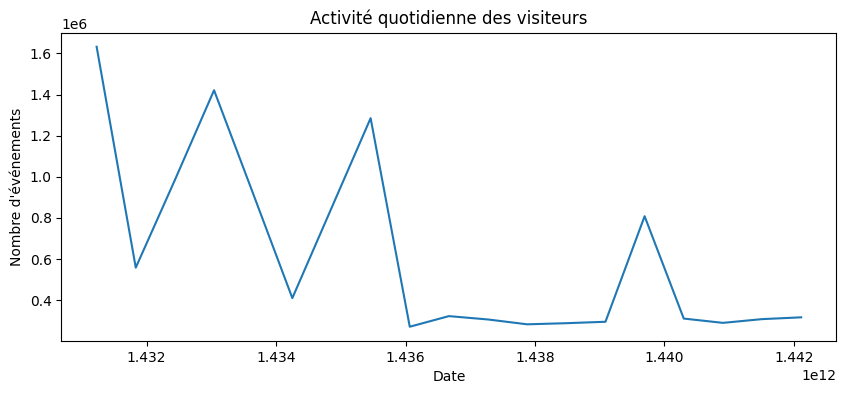

In [ ]:
#Activité par jour
category_tree.groupby("timestamp")["itemid"].count().plot(figsize=(10,4))
plt.title("Activité quotidienne des visiteurs")
plt.xlabel("Date")
plt.ylabel("Nombre d'événements")
plt.show()


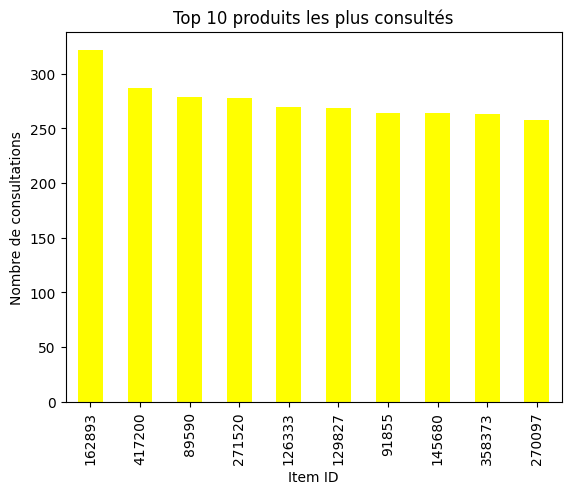

In [ ]:
# Produits les plus consultés
import pandas as pd
import matplotlib.pyplot as plt



# Produits les plus consultés
category_tree['itemid'].value_counts().head(10).plot(kind='bar', color='yellow')
plt.title("Top 10 produits les plus consultés")
plt.xlabel("Item ID")
plt.ylabel("Nombre de consultations")
plt.show()


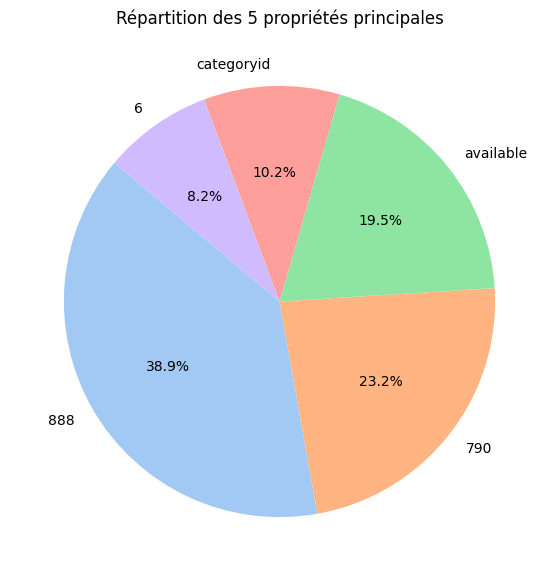

In [ ]:
#Répartition par catégorie
top_properties = category_tree["property"].value_counts().head(5)
plt.figure(figsize=(7,7))
plt.pie(
    top_properties.values,
    labels=top_properties.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Répartition des 5 propriétés principales")
plt.show()


In [ ]:
print(category_tree.columns)


Index(['timestamp', 'itemid', 'property', 'value'], dtype='object')


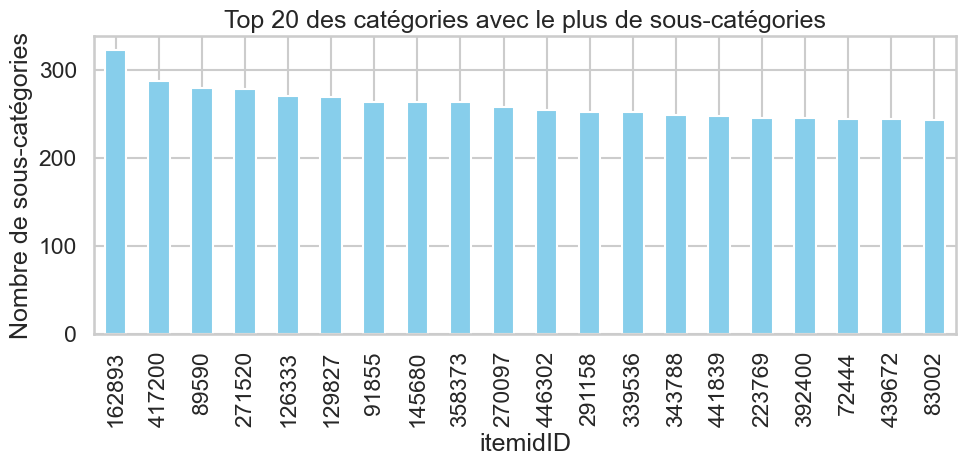

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Compter combien d’enfants chaque parent a
children_count = category_tree["itemid"].value_counts()

# Visualisation
plt.figure(figsize=(10,5))
children_count.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 des catégories avec le plus de sous-catégories")
plt.xlabel("itemidID")
plt.ylabel("Nombre de sous-catégories")
plt.tight_layout()
plt.show()  

In [48]:
print(category_tree.columns)
category_tree.head()


Index(['categoryid', 'parentid'], dtype='object')


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
# Construire un dictionnaire parent → enfants
tree = category_tree.groupby("parentid")["categoryid"].apply(list).to_dict()

def profondeur(cat, niveau=0):
    if cat not in tree or not tree[cat]:
        return niveau
    return max(profondeur(enf, niveau+1) for enf in tree[cat])

# Exemple : profondeur de la racine la plus haute
racines = category_tree[category_tree["parentid"].isna()]["categoryid"].tolist()
profondeurs = [profondeur(r) for r in racines]

print(f"Profondeur maximale de la hiérarchie : {max(profondeurs)}")


Profondeur maximale de la hiérarchie : 5


In [ ]:
import pandas as pd

item_properties_part1 = pd.read_csv('../data/item_properties_part1.csv' , sep= ',')
item_properties_part2 = pd.read_csv('../data/item_properties_part2.csv' , sep= ',')



In [ ]:
# Fusionner les deux DataFrames
item_properties = pd.concat([item_properties_part1 ,item_properties_part2], ignore_index=True)

print(item_properties.shape)
print(item_properties.head())


(20275902, 4)
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513


In [ ]:
# Aperçu rapide
item_properties.info()

# Vérifier les valeurs manquantes
print(item_properties.isnull().sum())

# Vérifier les doublons
print("Doublons :", item_properties.duplicated().sum())
item_properties.drop_duplicates(inplace=True)
prop_count = item_properties.groupby("itemid")["property"].nunique()
prop_count.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275902 entries, 0 to 20275901
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   object        
 3   value      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 618.8+ MB
timestamp    0
itemid       0
property     0
value        0
dtype: int64
Doublons : 0


<Axes: title={'center': 'Top 10 des propriétés les plus fréquentes'}, xlabel='property'>

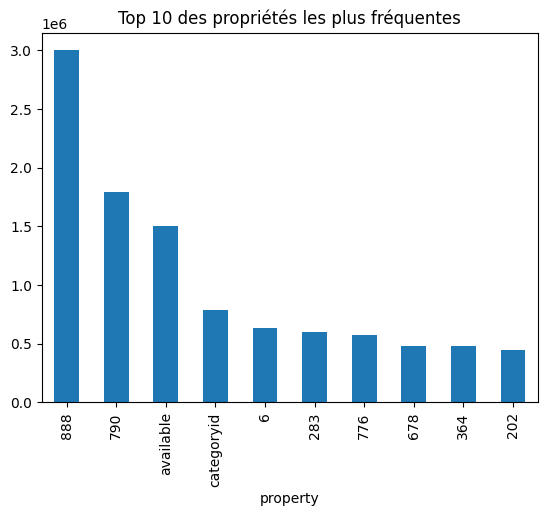

In [5]:
# afficher les 10 top des prop
item_properties["property"].value_counts().head(10).plot(kind="bar", title="Top 10 des propriétés les plus fréquentes")


<Axes: title={'center': 'Évolution des enregistrements par jour'}, xlabel='timestamp'>

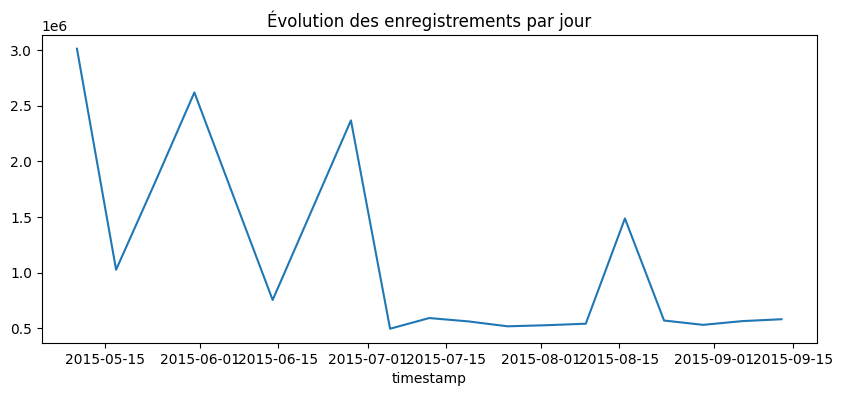

In [4]:
#Évolution des enregistrements par jour
item_properties["timestamp"] = pd.to_datetime(item_properties["timestamp"], unit="ms", errors="coerce")
daily_counts = item_properties.groupby(item_properties["timestamp"].dt.date)["itemid"].count()

daily_counts.plot(figsize=(10,4), title="Évolution des enregistrements par jour")


In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook"  # ou "vscode" selon ton éditeur



In [14]:
pio.renderers.default ="vscode"


In [ ]:
print(item_properties["property"].unique()[:50])  # affiche les 50 premières valeurs uniques
print(item_properties["property"].value_counts().head(10))  # top 10 des propriétés les plus fréquentes


['categoryid' '888' '400' '790' '917' 'available' '213' '6' '202' '451'
 '227' '839' '0' '1022' '566' '159' '830' '134' '19' '216' '28' '698'
 '881' '764' '776' '942' '188' '558' '1079' '61' '112' '544' '928' '701'
 '1036' '663' '1031' '230' '915' '619' '364' '348' '60' '678' '521' '962'
 '243' '71' '981' '438']
property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
283            597419
776            574220
678            481966
364            476486
202            448938
Name: count, dtype: int64


In [37]:
import pandas as pd

# Mets ici le bon chemin vers ton fichier CSV principal
df = pd.read_csv(r"C:\Users\utilisateur\Desktop\Bibliothequedata\Projet\data-viseu\data\raw\item_properties_part1.csv")

# Vérifie le chargement
print(df.head())
print(df.columns)


       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
Index(['timestamp', 'itemid', 'property', 'value'], dtype='object')


['0' '1']


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_3920\2487535287.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




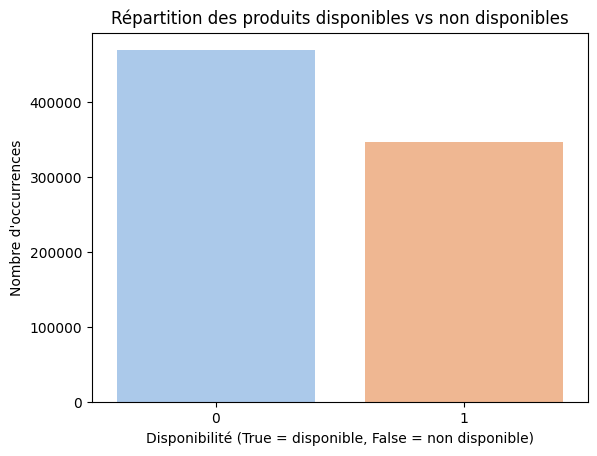

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrage : ne garder que les lignes liées à la disponibilité
available = df[df["property"] == "available"]

# Vérifie les valeurs possibles
print(available["value"].unique())

# Tracé
sns.countplot(data=available, x="value", palette="pastel")
plt.title("Répartition des produits disponibles vs non disponibles")
plt.xlabel("Disponibilité (True = disponible, False = non disponible)")
plt.ylabel("Nombre d'occurrences")
plt.show()





In [ ]:
import pandas as pd

#  Chargement des fichiers
events = pd.read_csv(r"C:\Users\utilisateur\Desktop\Bibliothequedata\Projet\data-viseu\data\raw\events.csv")
category_tree = pd.read_csv(r"C:\Users\utilisateur\Desktop\Bibliothequedata\Projet\data-viseu\data\raw\category_tree.csv")
part1 = pd.read_csv(r"C:\Users\utilisateur\Desktop\Bibliothequedata\Projet\data-viseu\data\raw\item_properties_part1.csv")
part2 = pd.read_csv(r"C:\Users\utilisateur\Desktop\Bibliothequedata\Projet\data-viseu\data\raw\item_properties_part2.csv")

# Fusion des 2 fichiers de propriétés
item_properties = pd.concat([part1, part2], ignore_index=True)


# Nettoyage de EVENTS

events = events.drop_duplicates()
events = events.dropna()
events.columns = events.columns.str.strip().str.lower()
events["timestamp"] = pd.to_datetime(events["timestamp"], unit="ms", errors="coerce")
events = events.dropna(subset=["timestamp"])


#  Nettoyage de CATEGORY_TREE

category_tree = category_tree.drop_duplicates()
category_tree = category_tree.dropna()
category_tree.columns = category_tree.columns.str.strip().str.lower()


# Nettoyage de ITEM_PROPERTIE
item_properties = item_properties.drop_duplicates()
item_properties = item_properties.dropna()
item_properties.columns = item_properties.columns.str.strip().str.lower()
item_properties["timestamp"] = pd.to_datetime(item_properties["timestamp"], unit="ms", errors="coerce")
item_properties = item_properties.dropna(subset=["timestamp"])


# Exporter les fichiers nettoyés

events.to_csv("events_donnees_nettoyees.csv", index=False, sep=";")
category_tree.to_csv("category_tree_donnees_nettoyees.csv", index=False, sep=";")
item_properties.to_csv("item_properties_donnees_nettoyees.csv", index=False, sep=";")

print(" Tous les fichiers nettoyés et enregistrés avec succès !")
print("Fichiers créés :")
print("- events_donnees_nettoyees.csv")
print("- category_tree_donnees_nettoyees.csv")
print("- item_properties_donnees_nettoyees.csv") 


 Tous les fichiers nettoyés et enregistrés avec succès !
Fichiers créés :
- events_donnees_nettoyees.csv
- category_tree_donnees_nettoyees.csv
- item_properties_donnees_nettoyees.csv
